In [148]:
import pandas as pd

In [149]:
df = pd.read_csv('/Users/tom/desktop/shark/attacks.csv',encoding='latin1')
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
print(df.describe())

              Year  original order
count  6300.000000     6309.000000
mean   1927.272381     3155.999683
std     281.116308     1821.396206
min       0.000000        2.000000
25%    1942.000000     1579.000000
50%    1977.000000     3156.000000
75%    2005.000000     4733.000000
max    2018.000000     6310.000000


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [152]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [153]:
# Dropping irrlevant or unuseful columns 

df.drop(columns=['Date', 'Year', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'], inplace=True)


In [154]:
# Dropping rows with NaN values
df.dropna(inplace=True)

In [155]:
#Cleaning the time column

import re

df = df[df['Time'].str.match(r'^\d{2}h\d{2}$')]

In [156]:
# Renaming replace the values "male" and "female" in the "Name" column with "Unknown" and use assign to avoid the SettingWithCopyWarning:
import numpy as np
df = df.assign(Name=np.where(df['Name'].isin(['male', 'female']), 'Unknown', df['Name']))

In [157]:
# Renaming the Case Number column to Date
df = df.rename(columns={'Case Number': 'Date'})

In [158]:
#Filter by keeping only rows where the 'Date' column matches the pattern '^\d{4}.\d{2}.\d{2}$' (e.g. '2022.01.01').
df = df[df['Date'].str.match(r'^\d{4}.\d{2}.\d{2}$')]
df.head()

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
23,2018.04.23,Unprovoked,MALDIVES,Alifu Alifu Atoll,Madoogali,Fishing,Ahmed Rasheed,M,32,5-inch cut to hand,N,21h50,Tiger shark
24,2018.04.22,Unprovoked,SOUTH AFRICA,Western Cape Province,"Robberg Beach, Plettenberg Bay",Paddle-skiing,Unknown,M,33,"No injury, shark bit hole in ski",N,09h40,"White shark, 2.5 m"
34,2018.04.03,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,19,Lacerations to left knee & lower leg,N,15h00,White shark
35,2018.03.31,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,Unknown,M,25,Injuries to right leg & hand,N,09h30,"Tiger shark, 12'"


In [159]:
#Removing rows in Date which contain 00
df = df[~df['Date'].str.contains('00')]

In [160]:
#Converting the Data column to Date type and deleting rows that the function is unable to parse
df[pd.to_datetime(df['Date'], errors='coerce').isna()]

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
390,2015.07-10,Unprovoked,USA,California,"Huntington Beach, Orange County",Surfing,Danny Miskin,M,38,"No injury, shark bumped & damaged board",N,08h45,"White shark, 7'"


In [161]:
# Sorting the data frame by Date
df = df.sort_values(by='Date')
df.head()

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
5545,1901.07.30,Unprovoked,SOUTH AFRICA,Western Cape Province,Windmill Beach,Swimming,"John Hendrick Adrian Chandler, a prisoner of war",M,29,"Right leg bitten & foot severed, right arm bit...",Y,14h15,White shark
5484,1906.01.20,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Washing horses,Ramdayal,M,30,"FATAL, hips & thigh bitten",Y,12h00,1.8 m to 2.7 m [6' to 9'] shark
5375,1912.01.26,Unprovoked,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",Swimming,James Edward Morgan,M,21,FATAL,Y,15h00,"2.8 m [9'3""] whaler shark captured 3 days late..."
5311,1916.07.01,Unprovoked,USA,New Jersey,"Beach Haven, Ocean County",Swimming,Charles E. Vansant,M,24,"FATAL, left leg bitten",Y,17h00,Thought to involve a 2.6 m [8.5'] white shark
5273,1919.01.09,Unprovoked,AUSTRALIA,New South Wales,"Sirius Cove, Sydney Harbor",Wading,Richard Simpson,M,13,"FATAL, right thigh bitten",Y,07h30,12' shark


In [162]:
# Renaming the index value so that the first row has an index value of 1 and it goes up in increments of 1. Renaming the index to Attack No.
df = df.reset_index(drop=True)
df.rename(index={i: i+1 for i in range(len(df))}, inplace=True)
df.index.name = 'Attack No.'

In [163]:
# Printing the names of the remainig columns
df.columns

Index(['Date', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species '],
      dtype='object')

In [164]:
#Reordering the columns to a more logical order
column_order = ['Date', 'Time', 'Country', 'Area', 'Location', 'Name', 'Sex ', 'Age', 'Activity', 'Type', 'Injury', 'Fatal (Y/N)',  'Species ']
df = df[column_order]


In [165]:
#Converting the fatal column to boolean 
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.contains('Y').astype(bool)
df.head()

,Date,Time,Country,Area,Location,Name,Sex,Age,Activity,Type,Injury,Fatal (Y/N),Species
Attack No.,,,,,,,,,,,,,
1,1901.07.30,14h15,SOUTH AFRICA,Western Cape Province,Windmill Beach,"John Hendrick Adrian Chandler, a prisoner of war",M,29,Swimming,Unprovoked,"Right leg bitten & foot severed, right arm bit...",True,White shark
2,1906.01.20,12h00,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Ramdayal,M,30,Washing horses,Unprovoked,"FATAL, hips & thigh bitten",True,1.8 m to 2.7 m [6' to 9'] shark
3,1912.01.26,15h00,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",James Edward Morgan,M,21,Swimming,Unprovoked,FATAL,True,"2.8 m [9'3""] whaler shark captured 3 days late..."
4,1916.07.01,17h00,USA,New Jersey,"Beach Haven, Ocean County",Charles E. Vansant,M,24,Swimming,Unprovoked,"FATAL, left leg bitten",True,Thought to involve a 2.6 m [8.5'] white shark
5,1919.01.09,07h30,AUSTRALIA,New South Wales,"Sirius Cove, Sydney Harbor",Richard Simpson,M,13,Wading,Unprovoked,"FATAL, right thigh bitten",True,12' shark


In [166]:
#Renaming Fatal Y/N column to Fatal 
df = df.rename(columns={'Fatal (Y/N)': 'Fatal'})

The next code converts the "Date" column of a Pandas DataFrame (df) into datetime format and removes any rows with invalid date values. The invalid date values are detected by using try-except block to handle the ValueError exceptions raised by the "pd.to_datetime()" function, and their index is stored in the "error_index" list. Finally, the rows with invalid dates are dropped from the DataFrame using "df.drop()" method.

In [167]:
import traceback
error_index = []
for i in range(len(df)):
    try:
        pd.to_datetime(df.iloc[i]['Date'])
    except ValueError:
        error_index.append(i)
df = df.drop(error_index)
df.head()

,Date,Time,Country,Area,Location,Name,Sex,Age,Activity,Type,Injury,Fatal,Species
Attack No.,,,,,,,,,,,,,
1,1901.07.30,14h15,SOUTH AFRICA,Western Cape Province,Windmill Beach,"John Hendrick Adrian Chandler, a prisoner of war",M,29,Swimming,Unprovoked,"Right leg bitten & foot severed, right arm bit...",True,White shark
2,1906.01.20,12h00,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Ramdayal,M,30,Washing horses,Unprovoked,"FATAL, hips & thigh bitten",True,1.8 m to 2.7 m [6' to 9'] shark
3,1912.01.26,15h00,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",James Edward Morgan,M,21,Swimming,Unprovoked,FATAL,True,"2.8 m [9'3""] whaler shark captured 3 days late..."
4,1916.07.01,17h00,USA,New Jersey,"Beach Haven, Ocean County",Charles E. Vansant,M,24,Swimming,Unprovoked,"FATAL, left leg bitten",True,Thought to involve a 2.6 m [8.5'] white shark
5,1919.01.09,07h30,AUSTRALIA,New South Wales,"Sirius Cove, Sydney Harbor",Richard Simpson,M,13,Wading,Unprovoked,"FATAL, right thigh bitten",True,12' shark


In [168]:
# Checking the value type in Date column 
print(df['Date'].dtype)

object


In [169]:
#Ensuring that the values in Date column are the right format
df = df[df['Date'].astype(str).str.match('^\d{4}\.\d{2}\.\d{2}$')]
df.head()

,Date,Time,Country,Area,Location,Name,Sex,Age,Activity,Type,Injury,Fatal,Species
Attack No.,,,,,,,,,,,,,
1,1901.07.30,14h15,SOUTH AFRICA,Western Cape Province,Windmill Beach,"John Hendrick Adrian Chandler, a prisoner of war",M,29,Swimming,Unprovoked,"Right leg bitten & foot severed, right arm bit...",True,White shark
2,1906.01.20,12h00,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Ramdayal,M,30,Washing horses,Unprovoked,"FATAL, hips & thigh bitten",True,1.8 m to 2.7 m [6' to 9'] shark
3,1912.01.26,15h00,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",James Edward Morgan,M,21,Swimming,Unprovoked,FATAL,True,"2.8 m [9'3""] whaler shark captured 3 days late..."
4,1916.07.01,17h00,USA,New Jersey,"Beach Haven, Ocean County",Charles E. Vansant,M,24,Swimming,Unprovoked,"FATAL, left leg bitten",True,Thought to involve a 2.6 m [8.5'] white shark
5,1919.01.09,07h30,AUSTRALIA,New South Wales,"Sirius Cove, Sydney Harbor",Richard Simpson,M,13,Wading,Unprovoked,"FATAL, right thigh bitten",True,12' shark


In [170]:
#Converting values in Date column to Datetime like values
df = df.copy()
df['Date'] = pd.to_datetime(df['Date'])

In [171]:
#Checking type of values in Date column 
print(df['Date'].dtype)

datetime64[ns]


In [172]:
#Converting Age to numeric data
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])
df['Age'] = df['Age'].astype(int)
df.head()

,Date,Time,Country,Area,Location,Name,Sex,Age,Activity,Type,Injury,Fatal,Species
Attack No.,,,,,,,,,,,,,
1,1901-07-30,14h15,SOUTH AFRICA,Western Cape Province,Windmill Beach,"John Hendrick Adrian Chandler, a prisoner of war",M,29,Swimming,Unprovoked,"Right leg bitten & foot severed, right arm bit...",True,White shark
2,1906-01-20,12h00,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Ramdayal,M,30,Washing horses,Unprovoked,"FATAL, hips & thigh bitten",True,1.8 m to 2.7 m [6' to 9'] shark
3,1912-01-26,15h00,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",James Edward Morgan,M,21,Swimming,Unprovoked,FATAL,True,"2.8 m [9'3""] whaler shark captured 3 days late..."
4,1916-07-01,17h00,USA,New Jersey,"Beach Haven, Ocean County",Charles E. Vansant,M,24,Swimming,Unprovoked,"FATAL, left leg bitten",True,Thought to involve a 2.6 m [8.5'] white shark
5,1919-01-09,07h30,AUSTRALIA,New South Wales,"Sirius Cove, Sydney Harbor",Richard Simpson,M,13,Wading,Unprovoked,"FATAL, right thigh bitten",True,12' shark


In [173]:
# Defining a function to convert the time string to a proper time format
def convert_time(time_str):
    # Split the string by "h"
    time_parts = time_str.split("h")
    # Return the string in the format "HH:MM"
    return time_parts[0] + ":" + time_parts[1]

# Applying the convert_time function to the "Time" column
df["Time"] = df["Time"].apply(convert_time)

df.head()

,Date,Time,Country,Area,Location,Name,Sex,Age,Activity,Type,Injury,Fatal,Species
Attack No.,,,,,,,,,,,,,
1,1901-07-30,14:15,SOUTH AFRICA,Western Cape Province,Windmill Beach,"John Hendrick Adrian Chandler, a prisoner of war",M,29,Swimming,Unprovoked,"Right leg bitten & foot severed, right arm bit...",True,White shark
2,1906-01-20,12:00,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Ramdayal,M,30,Washing horses,Unprovoked,"FATAL, hips & thigh bitten",True,1.8 m to 2.7 m [6' to 9'] shark
3,1912-01-26,15:00,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",James Edward Morgan,M,21,Swimming,Unprovoked,FATAL,True,"2.8 m [9'3""] whaler shark captured 3 days late..."
4,1916-07-01,17:00,USA,New Jersey,"Beach Haven, Ocean County",Charles E. Vansant,M,24,Swimming,Unprovoked,"FATAL, left leg bitten",True,Thought to involve a 2.6 m [8.5'] white shark
5,1919-01-09,07:30,AUSTRALIA,New South Wales,"Sirius Cove, Sydney Harbor",Richard Simpson,M,13,Wading,Unprovoked,"FATAL, right thigh bitten",True,12' shark


In [174]:
#Checking the type of Time column 

print(df['Time'].dtype)

object


In [175]:
#Changing Time to datetime and checking type

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
print(df['Time'].dtype)


datetime64[ns]


In [176]:
df.head()

,Date,Time,Country,Area,Location,Name,Sex,Age,Activity,Type,Injury,Fatal,Species
Attack No.,,,,,,,,,,,,,
1,1901-07-30,1900-01-01 14:15:00,SOUTH AFRICA,Western Cape Province,Windmill Beach,"John Hendrick Adrian Chandler, a prisoner of war",M,29,Swimming,Unprovoked,"Right leg bitten & foot severed, right arm bit...",True,White shark
2,1906-01-20,1900-01-01 12:00:00,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Ramdayal,M,30,Washing horses,Unprovoked,"FATAL, hips & thigh bitten",True,1.8 m to 2.7 m [6' to 9'] shark
3,1912-01-26,1900-01-01 15:00:00,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",James Edward Morgan,M,21,Swimming,Unprovoked,FATAL,True,"2.8 m [9'3""] whaler shark captured 3 days late..."
4,1916-07-01,1900-01-01 17:00:00,USA,New Jersey,"Beach Haven, Ocean County",Charles E. Vansant,M,24,Swimming,Unprovoked,"FATAL, left leg bitten",True,Thought to involve a 2.6 m [8.5'] white shark
5,1919-01-09,1900-01-01 07:30:00,AUSTRALIA,New South Wales,"Sirius Cove, Sydney Harbor",Richard Simpson,M,13,Wading,Unprovoked,"FATAL, right thigh bitten",True,12' shark


In [177]:
#Checking the type of Time column 
df['Time'].dtype

dtype('<M8[ns]')

In [178]:
# Extracting just the time component of the datetime values in Time column 
df['Time'] = df['Time'].dt.time
df.head()

,Date,Time,Country,Area,Location,Name,Sex,Age,Activity,Type,Injury,Fatal,Species
Attack No.,,,,,,,,,,,,,
1,1901-07-30,14:15:00,SOUTH AFRICA,Western Cape Province,Windmill Beach,"John Hendrick Adrian Chandler, a prisoner of war",M,29,Swimming,Unprovoked,"Right leg bitten & foot severed, right arm bit...",True,White shark
2,1906-01-20,12:00:00,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Ramdayal,M,30,Washing horses,Unprovoked,"FATAL, hips & thigh bitten",True,1.8 m to 2.7 m [6' to 9'] shark
3,1912-01-26,15:00:00,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",James Edward Morgan,M,21,Swimming,Unprovoked,FATAL,True,"2.8 m [9'3""] whaler shark captured 3 days late..."
4,1916-07-01,17:00:00,USA,New Jersey,"Beach Haven, Ocean County",Charles E. Vansant,M,24,Swimming,Unprovoked,"FATAL, left leg bitten",True,Thought to involve a 2.6 m [8.5'] white shark
5,1919-01-09,07:30:00,AUSTRALIA,New South Wales,"Sirius Cove, Sydney Harbor",Richard Simpson,M,13,Wading,Unprovoked,"FATAL, right thigh bitten",True,12' shark


In [179]:
# Creating a copy of the cleaned data fram and saving it as df_cleaned
df_cleaned = df.copy()

In [180]:
# Final check of cleaned dataframe
df_cleaned.head()

,Date,Time,Country,Area,Location,Name,Sex,Age,Activity,Type,Injury,Fatal,Species
Attack No.,,,,,,,,,,,,,
1,1901-07-30,14:15:00,SOUTH AFRICA,Western Cape Province,Windmill Beach,"John Hendrick Adrian Chandler, a prisoner of war",M,29,Swimming,Unprovoked,"Right leg bitten & foot severed, right arm bit...",True,White shark
2,1906-01-20,12:00:00,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Ramdayal,M,30,Washing horses,Unprovoked,"FATAL, hips & thigh bitten",True,1.8 m to 2.7 m [6' to 9'] shark
3,1912-01-26,15:00:00,AUSTRALIA,New South Wales,"Fig Tree Bridge, Lane Cove River, near Sydney",James Edward Morgan,M,21,Swimming,Unprovoked,FATAL,True,"2.8 m [9'3""] whaler shark captured 3 days late..."
4,1916-07-01,17:00:00,USA,New Jersey,"Beach Haven, Ocean County",Charles E. Vansant,M,24,Swimming,Unprovoked,"FATAL, left leg bitten",True,Thought to involve a 2.6 m [8.5'] white shark
5,1919-01-09,07:30:00,AUSTRALIA,New South Wales,"Sirius Cove, Sydney Harbor",Richard Simpson,M,13,Wading,Unprovoked,"FATAL, right thigh bitten",True,12' shark


In [181]:
import seaborn as sns
import matplotlib.pyplot as plt


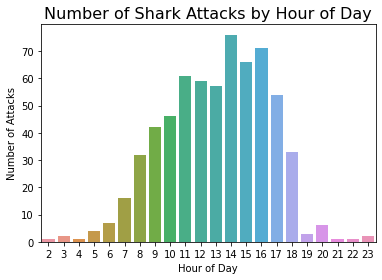

In [182]:
# Bar plot - Number of Shark Attacks by Hour of Day

df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%H:%M:%S')
df_cleaned['Hour'] = df_cleaned['Time'].dt.hour
sns.countplot(x='Hour', data=df_cleaned)
plt.title('Number of Shark Attacks by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Attacks')
plt.savefig('images/Number_of_Shark_Attacks_by_Hour_of_Day')
plt.show()

This code first converts the 'Time' column in the dataframe 'df_cleaned' from string type to datetime type, using the 'pd.to_datetime' function and the specified format of '%H:%M:%S' for hours, minutes, and seconds. It then creates a new column called 'Hour' by extracting the hour component from the 'Time' column using the '.dt.hour' accessor. The code then uses the seaborn library to plot a bar graph, using the 'sns.countplot' function, showing the number of shark attacks by hour of day using the 'Hour' column as the x-axis. The x-axis labels are labeled with hours and the y-axis labels show the number of attacks. The plot is then given a title of 'Number of Shark Attacks by Hour of Day' and labeled x and y axes. The plot is finally saved as an image and displayed using the 'plt.savefig' and 'plt.show' functions, respectively.

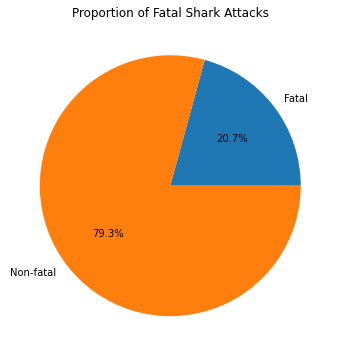

In [183]:
# Pie chart of fatal and non-fatal shark attacks.

#Get the number of fatal and non-fatal attacks
fatal_attacks = df[df['Fatal'] == True]['Name'].count()
non_fatal_attacks = df[df['Fatal'] == False]['Name'].count()

#Plot pie chart of proportion of fatal attacks
plt.figure(figsize=(6,6))
plt.pie([fatal_attacks, non_fatal_attacks], labels=['Fatal', 'Non-fatal'], autopct='%1.1f%%')

#Add title
plt.title("Proportion of Fatal Shark Attacks")
plt.savefig('images/pie')
plt.show()


This code creates a pie chart of fatal and non-fatal shark attacks. The first two lines of code extract the number of fatal and non-fatal attacks by counting the number of occurrences in the "Name" column where the "Fatal" column is either True or False in the "df" dataframe. The plt.figure() function is then used to set the figure size of the pie chart. The plt.pie() function is used to create the chart, with the number of fatal and non-fatal attacks as the input data and the labels set as "Fatal" and "Non-fatal". The autopct argument is used to display the percentage value of each category on the chart. The title is then added using the plt.title() function. 

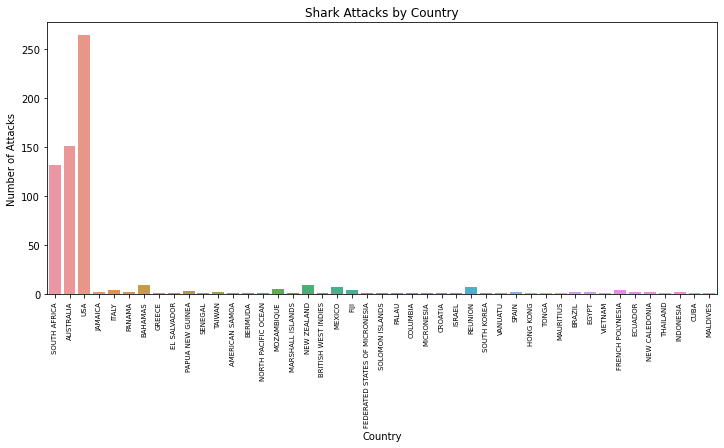

In [184]:
#Countplot of Shark Attacks by Country

# Set the figure size
plt.figure(figsize=[12,5])

# Plot a bar chart of the number of shark attacks by country
sns.countplot(x='Country', data=df_cleaned)

# Set the title, x and y labels
plt.title("Shark Attacks by Country")
plt.xlabel("Country")
plt.ylabel("Number of Attacks")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, fontsize=7)

# Show the plot
plt.savefig('images/Shark_Attacks_by_Country')
plt.show()

This code creates a bar chart of the number of shark attacks by country using the countplot() function from seaborn. The figure size is set to 12x5 inches. The x-axis represents the countries and the y-axis represents the number of shark attacks. The title, x and y labels are set, and the x-axis labels are rotated 90 degrees and the font size is set to 7 for better readability.

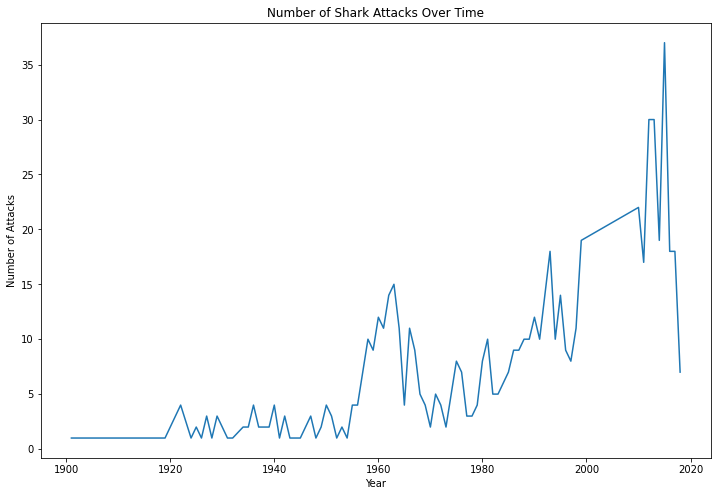

In [185]:
#Line Chart - Number of Shark Attacks Over Time

# Group data by year and sum the number of attacks
attacks_by_year = df_cleaned.groupby(df_cleaned['Date'].dt.year)['Name'].count()

# Plot line chart of number of attacks over time
plt.figure(figsize=(12,8))
plt.plot(attacks_by_year.index, attacks_by_year.values)

# Add title and labels
plt.title("Number of Shark Attacks Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.savefig('images/Number_of_Shark_Attacks_Over_Time')
plt.show()

This code creates a line chart to visualize the number of shark attacks over time. The first line groups the data in the "df_cleaned" dataframe by year using the "Date" column and counts the number of attacks for each year, storing the result in a new variable called "attacks_by_year". The plt.figure() function is then used to set the figure size of the chart. The plt.plot() function is used to plot the number of attacks over time, using the year values as the x-axis and the number of attacks as the y-axis, which are extracted from the "attacks_by_year" variable. The title and axis labels are then added using the plt.title(), plt.xlabel(), and plt.ylabel() functions. This code provides a visual representation of the number of shark attacks over time, which helps to identify trends and patterns in the data and analyze the historical frequency of shark attacks.

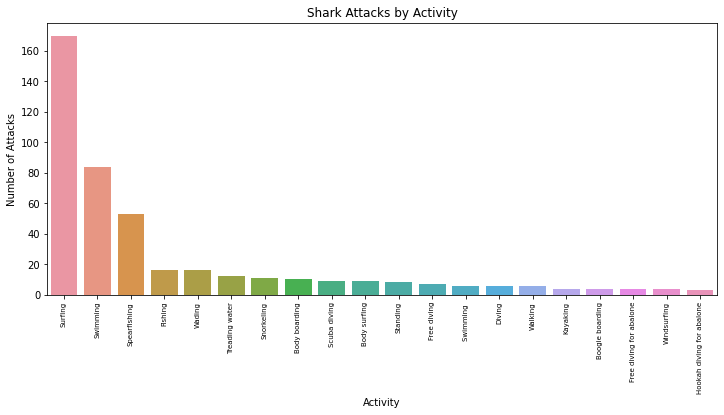

In [186]:
#Countplot of Shark Attacks by Activity

# Get the top 20 activities with the highest count
top_20_activities = df_cleaned['Activity'].value_counts().nlargest(20)

# Filter the original dataframe to only include the top 20 activities
df_top_20_activities = df_cleaned[df_cleaned['Activity'].isin(top_20_activities.index)]

plt.figure(figsize=[12,5])
sns.countplot(x='Activity', data=df_top_20_activities, order=top_20_activities.index)
plt.title("Shark Attacks by Activity")
plt.xlabel("Activity")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=90, fontsize=7)
plt.savefig('images/Shark_Attacks_by_Activity')
plt.show()

This code creates a bar chart of the number of shark attacks by activity using the countplot() function from seaborn. The figure size is set to 12x5 inches. First we get the top 20 activities with the highest count by using df_cleaned Activity .value_counts().nlargest(20). Then we filter the original dataframe to only include the top 20 activities. The x-axis represents the activities and the y-axis represents the number of shark attacks. The title, x and y labels are set, and the x-axis labels are rotated 90 degrees and the font size is set to 7 for better readability.

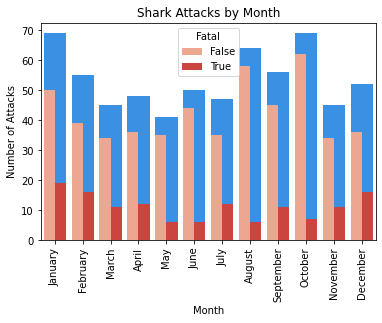

In [187]:
# Create a month column
df_cleaned["month"] = df_cleaned["Date"].dt.month

# Plot the data
ax = sns.countplot(x = "month", data = df_cleaned, color = "dodgerblue")

# Split the bars
bottom_plot = sns.countplot(x="month", hue="Fatal", data=df_cleaned, palette="Reds")

# Set labels and title
plt.xlabel("Month")
plt.ylabel("Number of Attacks")
plt.title("Shark Attacks by Month")

# Create custom labels for the x-axis
month_labels = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]

# Set the x-axis labels
plt.xticks(range(12), month_labels, rotation=90)

# Show plot
plt.savefig('images/Shark_Attacks_by_Month')
plt.show()



 This code is creating a visual representation of shark attacks by month. First, a "month" column is added to the data frame (df_cleaned) by extracting the month from the "Date" column using the dt.month method. The sns.countplot method is used to plot a bar chart showing the count of shark attacks for each month. The hue argument is used to differentiate between fatal and non-fatal attacks, resulting in two bars for each month, one in blue for total attacks and another in red for fatal attacks. The x-axis is labeled as "Month", the y-axis as "Number of Attacks", and the chart is given a title of "Shark Attacks by Month". Custom labels for the x-axis are created as a list of month names, and these are set as the x-axis labels using the plt.xticks method, with a 90 degree rotation to improve readability. 

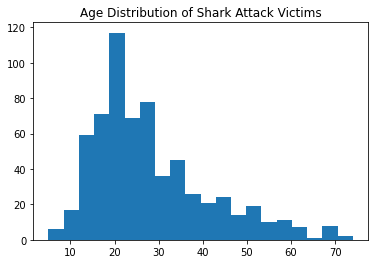

In [188]:
# Histogram of ages of victims

plt.hist(df_cleaned['Age'], bins=20)
plt.title('Age Distribution of Shark Attack Victims')
plt.xlabel
plt.savefig('images/Age_Distribution_of_Shark_Attack_Victims')
plt.show()

This code creates a histogram to represent the distribution of the ages of shark attack victims. The plt.hist() function is used to create the histogram, where the input is the "Age" column of the "df_cleaned" dataframe, and the number of bins is set to 20. The plt.title() function is then used to provide a title for the histogram, which is "Age Distribution of Shark Attack Victims". The x-axis label is also set with the plt.xlabel() function. 